In [365]:
# Student Name: Muhammad Waqas Aslam
# ID: 775131

# Task 1: Hello World

In [366]:
HelloWorld_omp = """#include <iostream>
#include <omp.h>
using namespace std;
int main() {
    #pragma omp parallel
    cout  << "   Hello World from thread = " << omp_get_thread_num() << endl;
    return 0;
}
"""



In [ ]:
cpp_file = open("HelloWorld_omp.cpp", "w")
cpp_file.write(HelloWorld_omp)
cpp_file.close()


!g++ -fopenmp HelloWorld_omp.cpp -o HelloWorld_omp
for _ in range(3):
    !export OMP_NUM_THREADS=4; ./HelloWorld_omp

In [368]:
HelloWorld_MPMD = """#include <mpi.h>
#include <iostream>

int main(int argc, char** argv) {
    MPI_Init(&argc, &argv);

    int world_rank;
    MPI_Comm_rank(MPI_COMM_WORLD, &world_rank);

    if (world_rank == 0) {
        std::cout << "Hello from Master " << world_rank << std::endl;
    } else {
        std::cout << "Hello from Worker " << world_rank << std::endl;
    }

    MPI_Finalize();
    return 0;
}
"""

In [ ]:
cpp_file = open("HelloWorld_MPMD.cpp", "w")
cpp_file.write(HelloWorld_MPMD)
cpp_file.close()

!mpic++ -fopenmp HelloWorld_MPMD.cpp -o ./HelloWorld_MPMD
for _ in range(3):
    !mpirun -np 4 ./HelloWorld_MPMD





# Task 2: Ping-Pong

In [370]:
PingPong = """#include <mpi.h>
#include <iostream>
#include <iomanip> // Required for std::setprecision
#include <unistd.h> // For usleep function

int main(int argc, char** argv) {
    MPI_Init(&argc, &argv);

    int world_rank;
    MPI_Comm_rank(MPI_COMM_WORLD, &world_rank);
    int ping_pong_count = 0;
    int partner_rank = (world_rank + 1) % 2;

    if (world_rank == 0) {
        // Process 0 sends two initial pings
        double current_time = MPI_Wtime();
        MPI_Send(&ping_pong_count, 1, MPI_INT, partner_rank, 0, MPI_COMM_WORLD);
        std::cout << "Process " << world_rank << " sent initial ping " << ping_pong_count
                  << " to " << partner_rank << " at " << std::fixed << std::setprecision(4) << current_time << std::endl;

        ping_pong_count++;
        current_time = MPI_Wtime();
        MPI_Send(&ping_pong_count, 1, MPI_INT, partner_rank, 0, MPI_COMM_WORLD);
        std::cout << "Process " << world_rank << " sent second ping " << ping_pong_count
                  << " to " << partner_rank << " at " << std::fixed << std::setprecision(4) << current_time << std::endl;

        ping_pong_count++;
    }

    while (ping_pong_count < 10) {
        double current_time;
        if (world_rank == ping_pong_count % 2) {
            usleep(1000); // Artificial delay for clearer time differentiation
            current_time = MPI_Wtime();
            MPI_Send(&ping_pong_count, 1, MPI_INT, partner_rank, 0, MPI_COMM_WORLD);
            std::cout << "Process " << world_rank << " sent ping_pong_count " << ping_pong_count
                      << " to " << partner_rank << " at " << std::fixed << std::setprecision(4) << current_time << std::endl;
        } else {
            usleep(1000); // Artificial delay
            current_time = MPI_Wtime();
            MPI_Recv(&ping_pong_count, 1, MPI_INT, partner_rank, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
            std::cout << "Process " << world_rank << " received ping_pong_count " << ping_pong_count
                      << " from " << partner_rank << " at " << std::fixed << std::setprecision(4) << current_time << std::endl;
        }
        ping_pong_count++;
    }

    MPI_Finalize();
    return 0;
}

"""

In [ ]:
cpp_file = open("PingPong.cpp", "w")
cpp_file.write(PingPong)
cpp_file.close()

!mpic++ PingPong.cpp -o PingPong
!mpirun -np 2 ./PingPong

# Task 3: Collective Communication

In [376]:
T3_MPI_Bcast_Reduce = """#include <mpi.h>
#include <iostream>

int main(int argc, char** argv) {
    MPI_Init(&argc, &argv);

    int rank, size;
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    int number;
    if (rank == 0) {
        // Root process initializes the number
        number = 10;
        std::cout << "Process 0 broadcasting number: " << number << std::endl;
    }

    // Broadcast number to all processes
    MPI_Bcast(&number, 1, MPI_INT, 0, MPI_COMM_WORLD);

    // Each process increments the number by its rank
    number += rank;

    // Output the incremented number from each process
    std::cout << "Process " << rank << " incremented number: " << number << std::endl;

    int sum;
    // Reduce all numbers to the sum at the root process
    MPI_Reduce(&number, &sum, 1, MPI_INT, MPI_SUM, 0, MPI_COMM_WORLD);

    if (rank == 0) {
        // Only the root process prints the sum
        std::cout << "Sum of all incremented numbers: " << sum << std::endl;
    }

    MPI_Finalize();
    return 0;
}

"""

In [ ]:
cpp_file = open("T3_MPI_Bcast_Reduce.cpp", "w")
cpp_file.write(T3_MPI_Bcast_Reduce)
cpp_file.close()

#!mpic++ T3_MPI_Bcast_Reduce.cpp -o T3_MPI_Bcast_Reduce
#!mpirun -np 2 ./T3_MPI_Bcast_Reduce

!mpicxx -o T3_MPI_Bcast_Reduce T3_MPI_Bcast_Reduce.cpp
!mpirun -np 4 ./T3_MPI_Bcast_Reduce

""""Process 0 incremented number: 10" (10 + 0)
"Process 1 incremented number: 11" (10 + 1)
"Process 2 incremented number: 12" (10 + 2)
"Process 3 incremented number: 13" (10 + 3)"""


# Task 4: Matrix Multiplication

In [386]:
#T4_MatMulti = 
"""#include <mpi.h>
#include <omp.h>
#include <stdio.h>
#include <stdlib.h>

#define N 1200  // Dimension of the matrix

void mat_mult(double A[N][N], double B[N][N], double C[N][N], int row_start, int row_end) {
    #pragma omp parallel for collapse(2)
    for (int i = row_start; i < row_end; i++) {
        for (int j = 0; j < N; j++) {
            double sum = 0.0;
            for (int k = 0; k < N; k++) {
                sum += A[i][k] * B[k][j];
            }
            C[i][j] = sum;
        }
    }
}

int main(int argc, char* argv[]) {
    MPI_Init(&argc, &argv);

    int rank, size;
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    double A[N][N], B[N][N], C[N][N];

    // Initialize matrices A and B with some values
    // For simplicity, let's assume A and B are identity matrices here
    #pragma omp parallel for collapse(2)
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            A[i][j] = (i == j) ? 1.0 : 0.0;
            B[i][j] = (i == j) ? 1.0 : 0.0;
            C[i][j] = 0.0;
        }
    }

    // Dividing the rows of the matrix among the MPI processes
    int rows_per_proc = N / size;
    int row_start = rank * rows_per_proc;
    int row_end = (rank + 1) * rows_per_proc;

    mat_mult(A, B, C, row_start, row_end);

    // Gather all parts of matrix C to the root process
    MPI_Gather(C + row_start, rows_per_proc * N, MPI_DOUBLE, C, rows_per_proc * N, MPI_DOUBLE, 0, MPI_COMM_WORLD);

    if (rank == 0) {
        // Output the result matrix C or check correctness
        printf("Matrix multiplication completed. C[100][100] = %f\n", C[100][100]);
    }

    MPI_Finalize();
    return 0;
}


"""

In [402]:
#cpp_file = open("T4_MatMulti.cpp", "w")
#cpp_file.write(T4_MatMulti)
#cpp_file.close()


!mpicxx -fopenmp -o T4_MatMulti T4_MatMulti.cpp
!mpirun -np 4 ./T4_MatMulti 
#!mpirun -np 1 ./T4_MatMulti s


Matrix multiplication completed. C[100][100] = 1.000000
Execution Time: 2.395860 seconds


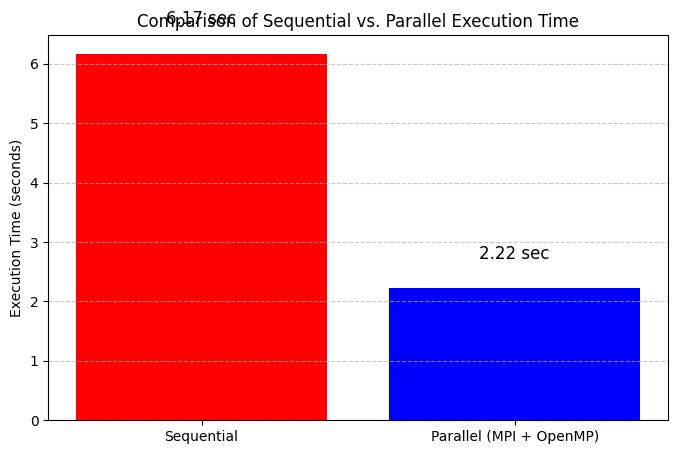

In [403]:
import subprocess
import matplotlib.pyplot as plt

# Execute sequential version
seq_command = ["mpirun", "-np", "1", "./T4_MatMulti", "s"]
seq_result = subprocess.run(seq_command, stdout=subprocess.PIPE, text=True)
seq_output = seq_result.stdout

# Execute parallel version
para_command = ["mpirun", "-np", "4", "./T4_MatMulti", "p"]
para_result = subprocess.run(para_command, stdout=subprocess.PIPE, text=True)
para_output = para_result.stdout

# Extract execution times dynamically from output
def extract_time(output):
    for line in output.split("\n"):
        if "Execution Time:" in line:
            return float(line.split(":")[1].strip().split()[0])  # Extract numeric part
    return None

seq_time = extract_time(seq_output)
para_time = extract_time(para_output)

# Store execution times
execution_times = {
    "Sequential": seq_time if seq_time else 0,  # Default to 0 if extraction fails
    "Parallel (MPI + OpenMP)": para_time if para_time else 0
}

# Extract labels and times
labels = list(execution_times.keys())
times = list(execution_times.values())

# Plot execution times
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(labels, times, color=['red', 'blue'])

# Labels and title
ax.set_ylabel("Execution Time (seconds)")
ax.set_title("Comparison of Sequential vs. Parallel Execution Time")
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display time values on bars
for i, v in enumerate(times):
    ax.text(i, v + 0.5, f"{v:.2f} sec", ha='center', fontsize=12)

plt.show()


# Task 5: Distributed Search

In [404]:
T5_DisSearch = """
#include <mpi.h>
#include <omp.h>
#include <stdio.h>
#include <stdlib.h>

#define N 1000000  // Array size (for large-scale tests)
#define SEARCH_VALUE 42  // Value to search for

// Function to initialize an array with random values
void init_array(int *array, int size) {
    for (int i = 0; i < size; i++) {
        array[i] = rand() % 100;  // Random numbers between 0 and 99
    }
}

// Parallel search within each MPI process using OpenMP
int parallel_search(int *array, int start, int end, int value) {
    int found = 0;

    #pragma omp parallel for
    for (int i = start; i < end; i++) {
        if (array[i] == value) {
            found = 1;
        }
    }
    return found;
}

int main(int argc, char *argv[]) {
    int rank, size;
    int *array = NULL;
    int *local_array = NULL;
    int local_start, local_end;
    int local_found = 0, global_found = 0;

    // Initialize MPI
    MPI_Init(&argc, &argv);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    // Allocate memory for the array
    if (rank == 0) {
        array = (int *) malloc(N * sizeof(int));
        init_array(array, N);
    }

    // Calculate local range for each process
    int local_size = N / size;
    local_start = rank * local_size;
    local_end = (rank == size - 1) ? N : (rank + 1) * local_size;  // Handle last process

    // Allocate local array for each process
    local_array = (int *) malloc(local_size * sizeof(int));

    // Scatter the array to all processes
    MPI_Scatter(array, local_size, MPI_INT, local_array, local_size, MPI_INT, 0, MPI_COMM_WORLD);

    // Perform parallel search in the local part of the array
    local_found = parallel_search(local_array, 0, local_end - local_start, SEARCH_VALUE);

    // Gather the results (found/not found) at the root process
    MPI_Reduce(&local_found, &global_found, 1, MPI_INT, MPI_MAX, 0, MPI_COMM_WORLD);

    // Root process prints the result
    if (rank == 0) {
        if (global_found) {
            printf("Value  found in the array!\n", SEARCH_VALUE);
        } else {
            printf("Value  not found in the array.\n", SEARCH_VALUE);
        }
        free(array);  // Free the array memory
    }

    free(local_array);  // Free the local array memory
    MPI_Finalize();
    return 0;
}
"""

# Task 6: Extension